<a href="https://colab.research.google.com/github/myazdani/pytorch-deep-learning/blob/master/pytorch_chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1

# What is PyTorch?

PyTorch is a Python library for building computational graphs. Even though you might see it used in a lot of deep learning or machine learning applications, it is much more general. But what is a computational graph? 

A computational graph is a graph-based framework for describing algebraic expressions such as y = 2x or y = mx + b along with their derivatives. Such computational graphs are usually shown like below:

![alt text](https://pbs.twimg.com/media/D4II6qjU0AAYbgx.jpg:small)

Above we see a graph that is a collection of nodes and directed edges. In a computational graph the edges represent functions applied on data: in our simple example the multiplication of two values. The nodes store data values, in this case the constant “2”, and the variables “x” and “y”. When we use the computation graph to compute y = 2x, this is referred to as the forward computation or the forward pass. 




Often in scientific computing and machine learning, we are not just interested in the forward computation, but also want to know how this function is changing. In other words,  we want to compute the derivative of this function. Because of the importance of derivatives, the nodes in the computational graph are also endowed with the derivatives of the incoming edges that express a computation. This framework allows us to compute derivatives efficiently with what is referred to as backward computation or the backward pass. We will cover these ideas much further later in the chapter. 


At first the computational graph framework may seem like an excessive way of computing algebraic expression. However, the ability for forward computation (just algebraic expressions) along with backward computation (their respective derivatives) provides an incredible efficient and unified framework for numerous scientific applications including machine learning. The computational graph really shines at taking derivatives because complicated algebraic expression reduce to a series of backward computations, freeing us humans from the need to analytically derive derivatives. 

PyTorch provides a computational graph framework that allows us to perform forward and backward computation at ease. PyTorch comes equipped with several useful data structures and modules that makes defining graphs easy. In particular, in this book we will be covering at great length:

- torch.Tensors: the primary data structure in PyTorch, Tensors are multi-dimensional arrays equipped with numerous linear algebraic methods. If you are a NumPy user, learning PyTorch Tensor comes at ease since the syntax is similar. In addition to sharing many similarities with NumPy arrays, PyTorch Tensors can also be offloaded on GPU with CUDA support to take advantage of accelerated matrix multiplications. 
- torch.autograd: The autograd module keeps track of the forward computations in the computation graph to then allow us to perform automatic differentiation in the backward pass. 
- torch.optim: A collection of gradient-based optimization solvers, such as Stochastic Gradient Descent and Adam. 
- torch.nn: While the operations in torch.Tensors will allow us to define any computational graph, certain computations in deep learning are so common that torch.nn will provide a high level API for them. Typically for deep learning applications, torch.nn is used to create sophisticated high level neural network architectures.

If you do not understand what a lot of the terms above means at this point, do not fret. We just want to give a high level overview of what PyTorch is about and will be spending the rest of the book to get into the details here. 

The latest news and information on PyTorch can be found on https://pytorch.org/ and the package itself is on GitHub: https://github.com/pytorch/pytorch. PyTorch also has a thriving online community with online forums https://discuss.pytorch.org/ and on popular social media platforms such as Facebook and Twitter. 


# Downloading and installing PyTorch

PyTorch can be downloaded and installed in your system with several popular methods. Like most popular Python libraries, PyTorch can be downloaded with either the pip or conda package managers. To install PyTorch from the source, follow the latest instructions from GitHub: https://github.com/pytorch/pytorch#from-source

Setting up the right computing environment can be tricky and take some work. To ensure uniformity (and as recommended by the PyTorch distributors),  we suggest using the conda package manager and installing the Anaconda environment (https://www.anaconda.com/distribution/ ). In addition to providing the excellent package manager conda, the Anaconda environment also provides many essential scientific computing libraries that we will use such as NumPy, SciPy, and MatplotLib, and Intel’s highly efficient Math Kernel Library (MKL) that includes BLAS and other fast optimized Linear Algebra routines. If you are installing PyTorch make sure these libraries are installed (and if you have an NVIDIA GPU you will need to install CUDA support with the libraries CUDA and cuDNN). See the latest details on package version numbers here: https://github.com/pytorch/pytorch#from-source

The PyTorch.org website nicely summarizes the different ways of installing PyTorch, with which version of OS, package manager, Python and CUDA version. For example, in the figure below from PyTorch.org shows how to install PyTorch 1.0 on Linux using the Conda package manager:

![alt text](https://pbs.twimg.com/media/D4INajSVUAAsGXB.jpg:large)


`conda install pytorch torchvision cudatoolkit=9.0 -c pytorch`

In addition to installing PyTorch, the above command also installs the torchvision (specialized PyTorch library for image processing and computer vision applications) and the CUDA Toolkit libraries. 

Once you have downloaded and successfully installed PyTorch, you should be able import to from the python prompt:

`>> import torch`

If you have gotten to this step without any errors, congratulations! You now have PyTorch on your machine and ready to use one of the most powerful machine learning frameworks of today!

## Additional PyTorch libraries

In addition to PyTorch, libraries like torchvision augment the components of PyTorch with additional functions for tensor manipulations of specialized data structures such as images, text, and audio. torchvision, for example, provides interfaces for commonly used datasets such as MNIST and CIFAR and common ways of transforming images (such cropping and rotating). See https://pytorch.org/docs/stable/torchvision/ for more details on the official documentation.

Similarly, the torchaudio package is the audio analog of torchvision. torchaudio also has common datasets and audio transformations included in the package. See https://pytorch.org/audio/
for more details on the official documentation. Similarly, the torchtext library provides similar functionalities for dealing with text data types and the official documentation can be found here: https://torchtext.readthedocs.io/en/latest/index.html


# Working with Tensors in PyTorch


While a tensor is a special type of mathematical object with its own tensor calculus, for practical machine learning applications we can think of a tensor simply as a numeric multidimensional array. PyTorch tensors share many similarities with NumPy arrays and follow similar functionality. In fact, you can think of PyTorch tensors as NumPy arrays but with extra computational super powers. The biggest advantages of using PyTorch over NumPy arrays are the ability to track gradients for backward computation (ie, the backward pass or backpropagation for computing automatic differentiation to be covered later) and the ability to offload computations on the GPU. In fact, the success of modern deep learning has relied on the ease of computing gradients and doing it quickly thanks to GPU acceleration. 



Understanding tensors is at the core of using PyTorch and building deep learning applications and we will cover it here at some length. Here are examples of three tensors:

[0.1], [2.1, -1.1, 0, 4], 2d 

The first example that has just one number is usually called a “0 dimensional tensor”, the middle example is just a list of numbers that we call a “1 dimensional” tensor and the last example is a list of lists or a “2 dimensional” tensor. We can keep adding these lists together to get even higher dimensional tensors and it is very common in deep learning applications to see tensor dimensions go to 3, 4, or even much, much more.

In other words, tesnors in PyTorch are a special type of data structure for organizing a collection of numbers. Mathematically though, they are much deeper than just a “collection of numbers.” We will later describe some mathematical, but intuitive, interpretations that will help immensely in appreciating the importance of tensors. 


## Creating tensors in PyTorch

Let's create some tensors in PyTorch and manipulate them to get a feel. We will import the `torch` library and create a simple tensor of three elements and store it in the variable `x`





In [0]:
import torch


In [2]:
x = torch.tensor([-1.3, 9.1, 3.3])
print(x)

tensor([-1.3000,  9.1000,  3.3000])


All we had to do to create a PyTorch tensor was create a regular Python list, followed by using the `torch.tensor` function. As expected, we could have just easily done something like:

In [3]:
x_list = [-1.3, 9.1, 3.3]
x_tensor = torch.tensor(x_list)
print(x_tensor)

tensor([-1.3000,  9.1000,  3.3000])


The above cell makes our steps very clear: we first make a python list and store it in the variable `x_list`. We then use the function `torch.tensor` to store the Python list as a PyTorch tensor in the variable `x_tensor`.

Like all variables in Python, `x`, `x_list`, and `x_tensor` are all objects. Specifically we can see that `x` is the `tensor.Tensor` object in PyTorch as expected:

In [4]:
type(x)

torch.Tensor

And we can similarly inspect the object types for the variables `x_list` and `x_tensor` we have created so far. 

Often when we are dealing with tensors, we are referring to them as variable names such as `x`. In our toy example we know the dimension is 1 and that there are 3 total elements because we dedfined the tensor and we printed it. 

While we could try to print the variable like we have done here to know what its dimension and number of elements is, that would take far too long for us to individually count. Moreover, in modern machine learning applications, the total number of elements in the tensor can be anywhere from hundreds to many millions! Surely there is a better way of knowing the number of elements than just counting!

Of course, just like NumPy Arrays, PyTorch torch tensors are equipped with numerous methods that allow us to perform many common operations. 

To know the dimension of the array, we can simply use the `.dim()` method

In [5]:
x.dim()

1

In our example with the tensor `x` we see that dimension of the tensor is 1 as we would expect. To know the number of elements in our tensor, we can use the `.size()` method:

In [6]:
x.size()

torch.Size([3])

Again, since we have a list of 3 items we see that the size of the tensor is what we expect. Note that the `size` method returns a PyTorch object `torch.Size`.  If you want just a pure numeric integer that gives us the number of elements,  you can use the `numel()` method on a `torch.Size` object as:

In [7]:
x.size().numel()

3

Such decisions depend on the program you are trying to write and the style of programming you are trying to use along with all the variets of syntatctic sugar. 


Having covered some of the basics of what tensors look like, lets create a slightly more sophisticted tensor. Here we will make a 2 dimensional tensor with 2 rows and 3 columns with random values (from normal random generator):

In [0]:
z = torch.randn(2,3)
print(z)

tensor([[ 0.7686, -1.0158, -3.0055],
        [-0.7388,  0.9558, -0.6715]])


Again, each element in `z` is dawn from a normal distribution so the values you print on your computer will be different on your machine. We can again use the `dim()` and `size()` methods to get verify the shape of this tensor without having to print it and individually count the elements

In [0]:
z.dim()

2

In [0]:
z.size()

torch.Size([2, 3])

The `torch.randn()` method doesn't just limit us to create 2 dimensional tensors, however. We can artibitrarily stack a high dimensional tensor by continuing to specify how many elemenrts should be in each dimension. For example, below we create a 4 dimensional tensor

In [0]:
high_dim_tensor = torch.randn(2,3,4,2)
high_dim_tensor.size()
high_dim_tensor.dim()

4

This 4 dimensional tensor has 2 elements in its first dimesnion, 3 elements in the second, 4 in the third dimension, and 2 elements in the fourth and last dimension. 

Just as in Numpy Arrays, we can use "indexing" to access specific parts of a tensor. Let's say we only wanted to print the first row of `z`. We can use the same bracket syntax (called indexing slicing) used in Numpy Arrays on PyTorch tensors

In [0]:
print(z[0,:])

tensor([ 0.7686, -1.0158, -3.0055])


The `:` indicates that we want every single element in the dimension (in this case the second dimension, also known as the column) to be displayed.  Similarly, if we want to print the last column, we could either use the index 2 (remember indexing in Python starts with 0) or simply -1 (element from the end):

In [0]:
z[:,-1]

tensor([-3.0055, -0.6715])

If we want to add the first row of `z` with `x`, we can just simply add the two tensors:

In [0]:
z[0,:] + x

tensor([-0.5314,  8.0842,  0.2945])

Similarly, if we want to add the second row of `z` to `x` we can just do:

In [0]:
z[1,:] + x

tensor([-2.0388, 10.0558,  2.6285])

But what happens if we do `z + x`? Readers with a Linear Algebra background may object that such an operation doesn't make sense since the shapes of the two tensors do not line up. While mathematically that is true, in PyTorch it is perfectly legal:

In [0]:
z + x

tensor([[-0.5314,  8.0842,  0.2945],
        [-2.0388, 10.0558,  2.6285]])

What is going on here?! As you can see, PyTorch has done something very clever. Behind the scenes, PyTorch  notices that there is a dimension mismatch between `x` and `z` but that the number of elements in the single dimension of `x` matches with the second dimension in `z`. Let's review again the shapes of the two tensors with the `size()` method:

In [0]:
print("The shape of z is", z.size())
print("The shape of x is", x.size())


The shape of z is torch.Size([2, 3])
The shape of x is torch.Size([3])


Since the single dimension in `x` has 3 elements and the second dimension in `z` has 3 elements, PyTorch *broadcasts* `x` into 2 dimensional arrays that look something like this:



Once this is done then addition follows what we expect. This technique is referred to as *broadcasting* and is a common operation in NumPy and PyTorch.
While you can certainly create a for loop that goes through each row in `z` and adds to `x`, broadcasting is often much faster. In fact, broadcasting is usually preferred when you consider the following example

In [0]:
big_matrix = torch.randn(1000,3)

In [0]:
%%timeit

for i in range(1000):
    _ = big_matrix[i,:] + x

100 loops, best of 3: 5.59 ms per loop


We are storing the values into the dummy variable `_` since we do not care about actual values here. We just want to know how fast it is to go through each row in a big tensor to add to another tensor.

Now lets do the same thing using broadcasting:

In [0]:
%%timeit

_ = big_matrix + x

The slowest run took 8.53 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 21.5 µs per loop


Whoa! Now this is much faster!!!! For this reason you will often see people use broadcasting to great extend. 

We can see see that broadcasting can work with any aribitraty dimension tensors as long as the number of elements match up:

In [0]:
torch.randn(1,1,3,1) / x

tensor([[[[-0.6518,  0.0931,  0.2568],
          [ 0.7315, -0.1045, -0.2882],
          [ 0.9381, -0.1340, -0.3696]]]])

In addition to the "+" operator, broadcasting can be applied for the other arithmetic operations of subtraction, multiplication, and division.


While broadcasting is PyTorch's way of autmatically reshaping a tensor so that arithmetic operations can proceed unhitched, we sometimes want to explicity reshape a tensor to a specific shape. In PyTorch the `view()` method in `torch.Tensor` allows us to do exactly just that. Below we will reshape the `z` tensor to have 3 rows and 2 columns instead of 2 rows and 3 columns (ie, we perform a "transpose" operation)

In [0]:
z.view(3,2)

tensor([[ 0.7686, -1.0158],
        [-3.0055, -0.7388],
        [ 0.9558, -0.6715]])

We can also introduce dummy singlton dimensons using the `view()` method:

In [0]:
z.view(1,3,2)

tensor([[[ 0.7686, -1.0158],
         [-3.0055, -0.7388],
         [ 0.9558, -0.6715]]])

While the number of elements is still the same, we have introduced a singlton in the first dimension that is just 1. 

We can also use "-1" as a way to specify anything that is left over after a reshape.  For example, below says reshape `z` to have 3 rows, and then let it have as many columns left over in the data (just 3 in our case)

In [0]:
z.view(3,-1)

tensor([[ 0.7686, -1.0158],
        [-3.0055, -0.7388],
        [ 0.9558, -0.6715]])

Using such operation with the `view()`  method in PyTorch are very common. 


# CPU and GPU devices

One of the significant advantages of using PyTorch tensors as opposed to Numpy arrays is the ability to utilize the GPU to offload computations. By default when we create tensors in PyTorch, the tensors are computed with the CPU. If we want to use the GPU, we have to specify which GPU device we want to use and offload the PyTorch tensor on the GPU device.

To see if a GPU device is available on your system, you can use the function `torch.cuda.is_available()`

In [0]:
torch.cuda.is_available()

True

If the output of this method is True, congratulations! PyTorch has access to a GPU that you can use to greatly speed up computations! If the output is False and you do have a GPU, then you need to recheck the installation of PyTorch with the CUDA and cuDNN device drivers. 

It is very common to define the device that you have with the `torch.device()` method. For example, if you have CUDA properly installed and the output of `torch.cuda.is_available()` is True, then you can have a variable called `device` that specifies which device you are using:

In [0]:
device = torch.device("cuda")

Even if you have GPU but prefer to use CPU, then you can similarly specify to use CPU by running:

In [0]:
device = torch.device("cpu")

Finally, if you want your code to flexibily run on either CPU or GPU, then you can have a Python conditional statement such as the following:

In [0]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

This conditional will automatically then set device to either CPU or GPU depending on what you have. It is very common to see deep learning examples to use such device specifications at the begining of the code. 

Once you have setup  the device, you can simply send the tensors you have created to it. This can be done with the `to()` method.



In [0]:
z_on_specified_device = z.to(device)




# Importing other packages for use with PyTorch

While PyTorch is a powerful deep leanrning framework, there are many other libraries in Python that we will need to prepare data and aid us in building PyTorch applications. In particular, NumPy (which we have been discussing), Pandas, Scikit-Learn, and Matplotlib are essential general data tools that we will need. If you have installed the Python distribution from Anaconda, these libraries are already included. Otherwise, you should install them using either `pip` or `conda`

It is very common for us to want to convert a NumPy Array to a PyTorch tensor. Lets revisit our PyTorch tensor `z`




In [0]:
print(z)

tensor([[ 0.7686, -1.0158, -3.0055],
        [-0.7388,  0.9558, -0.6715]])


Clearly from the printout we can see that `z` is a PyTorch tensor as we exepct. Let's say we would like to plot the first row of `z`. We can specify the first row of `z` using indexing the slize `z[0,:]`. Matplotlib gives us powerful plotting tools, so lets use that:

In [0]:
import matplotlib.pyplot as plt;

## This results in an error! Matplotlib does not recognize PyTorch tensors!
# plt.plot(z[0,:])

If you run the above you will get an error! This is because Matplotlib at the time of this writing does not recognize PyTorch tensors. We will have to convert this PyTorch tensor to a NumPy Array. 

All PyTorch tensors have the method `numpy()` that convert the PyTorch tensor to a Numpy array

In [0]:
first_row = z[0,:].numpy()
type(first_row)

numpy.ndarray

Now we can either plot `first_row` or just directly convert the PyTorch tensor to NumPy Array and plot:

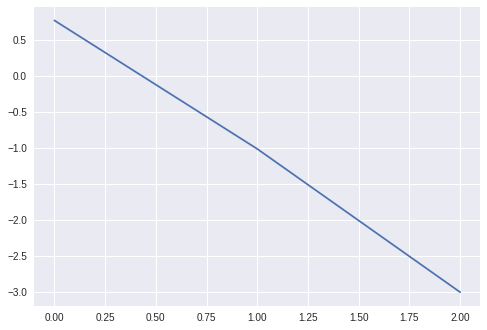

In [0]:
plt.plot(z[0,:].numpy());

We can similarly convert a NumPy Array to a PyTorch tensor using the function `torch.tensor()`. Earlier we showed how `torch.tensor()` accepts a Python list, but it also supports taking as inputs NumPy Arrays and even PyTorch tensors (more on that later). Let's create a NumPy Array of 3 elements all having the value of 5

In [0]:
import numpy as np

const_arr_numpy = 5*np.ones(3)

const_arr_tensor = torch.tensor(const_arr_numpy)

`const_arr_tensor` is now a PyTorch tensor that we can apply the usual PyTorch operations on. 

There has been something that we have not discussed yet though and it will be a headache when passing data between PyTorch tensors and NumPy Arrays if not careful: data types. By default, when we create a NumPy Array the datatype is a 64-point float. We can check this with the `dtype` attribute of NumPy arrays

In [0]:
const_arr_numpy.dtype

dtype('float64')

When we convert this NumPy Array to a PyTorch tensor, `torch.tensor()` is smart enough to infer the data and casts the converted PyTorch tensor to be of the same type. We can similarly check the data type of our newly created array with the `dtype` attribute

In [0]:
const_arr_tensor.dtype

torch.float64

As expected we see that the tensor's data type is a 64-point float just like the NumPy array that was passed to `torch.tensor()` in the assignment. 

This is all well and good until you try to mix this tensor with other tensors you have created with PyTorch. This is because the default datatype in PyTorch tensors are 32-point tensors. Let's check the tensor `z` datatype that we had created before:

In [0]:
z.dtype

torch.float32

Recall that we created `z` using `torch.randn()` and since 32-point floats are PyTorch's default, we see that indeed this is the case with `z`. 

When we try to add `z` to `const_arr_tensor` (with broadcasting) we get an error:

In [0]:
const_arr_tensor.float()

tensor([5., 5., 5.])

In [0]:
## results in data type error
# z + const_arr_tensor

We can avoid this error by type casting either `z` or `const_arr_tensor` - let's type cast to a 32-point float 

In [0]:
z + const_arr_tensor.float()

tensor([[5.7686, 3.9842, 1.9945],
        [4.2612, 5.9558, 4.3285]])

Alternative, when we converted the NumPy Array to the PyTorch tensor using `torch.tensor()` we could have made the data type explicit by specifying the dtype argument. This would look as follows: 

In [0]:
const_arr_tensor = torch.tensor(const_arr_numpy, dtype = torch.float32)

z + const_arr_tensor # no error!

tensor([[5.7686, 3.9842, 1.9945],
        [4.2612, 5.9558, 4.3285]])

Now that we have setup the tensors with the datatype that we want, lets take a step back at the variables that we have active in memory. The NumPy array `const_arr_numpy` and the PyTorch tensor `const_arr_tensor` have the same values but occupy two different places in memory. So even though they store the same values, they are two different variables and affecting one will not affect the other. In other words, `const_arr_tensor`is a copy of `const_arr_numpy` by *value* as opposed to a *copy by reference*.



Sometimes we wish to *copy by reference* however. We can perform a copy by reference by using the function `torch.from_numpy()`. Let's illustrate with an example

In [0]:
const_arr_tensor = torch.from_numpy(const_arr_numpy)

Although `const_arr_tensor`is a PyTorch tensor and `const_arr_numpy` is a NumPy Array, they both share the same memory! So changing the values in one of them will change the other. For example, 

In [0]:
const_arr_tensor += 1
print(const_arr_tensor)
print(const_arr_numpy)

tensor([6., 6., 6.], dtype=torch.float64)
[6. 6. 6.]


Note that as in NumPy, the `+=` is an in-place operation that directly manipulates `const_arr_tensor` (and `const_arr_numpy` in this case) without creating any new objects (as opposed to an assignment such as `const_arr_tensor = 1 + const_arr_tensor`). 



# Reading data from a file


It is no secret that machine learning algorithms are hungry for data. To build machine learning applications, we will need to load data into PyTorch. In addition to Python's own file reading and writing management,  NumPy and Pandas offer many convenient functions for us to load external datasets into a structued array. We can then use the NumPy converter methods we discussed in the previous section to convert the loaded datasets into PyTorch tensors. 


Let's consider an example of reading a CSV file with Pandas. We will load the Iris data set hoseted in this GitHub Gist: https://gist.github.com/curran/a08a1080b88344b0c8a7

This is the Gist website that contains the CSV file. To get the raw CSV file we would have to use the direct URL to the CSV that you can get from the "Raw" button in GitHub Gist: https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv


As of Pandas version `0.19.2` and later, we can read a CSV file from a URL directly into a Pandas DataFrame using the  `read_csv()` method:

In [0]:
import pandas as pd

url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv"

df = pd.read_csv(url)

In [0]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The Iris dataset is a famous dataset promoted by the early 20th century statistician Ronald Fischer where he used it to illustrate the Linear Discriminant Analysis algorithm (which today you can simply run from Scikit-learn). Today the Iris dataset is still used as an example data set to test out algorithmic ideas against a real world dataset that is not too large for quick iteration. 

From Wikipedia, 

> The [Iris] data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.



We can see in the data set that we loaded the first four columns are the flower features and the last column is the type of flower (`species`). In machine learning, the last column is usually the "target" variable we are interested in predicting from the features. We often represent the set of features (`sepal_length`,	`sepal_width`,	`petal_length`,	`petal_width`) as their own own array and the targets, `species`, as a separate array. 

We will call the features array `X` and the targets `y`. One way to get the set of features in the Pandas DataFrame is to specify the column names as a list of the feature names. Alternatively, since our data set is so clean, we can just select the first 4 columns with the `iloc` method. We can then use the `.values` attribute to just get the underlying NumPy array in the DataFrame:




In [0]:
X = df.iloc[:,:3].values

In our case since the DataFrame is so clean, we have no missing values and `X` is a purely numeric array. Often though real data may be messy and contain non-numeric values. You will have to take extra steps to prepare the data to ensure you have a purely numeric array. Often using the combination of the methods `pd.to_numeric()` from Pandas and `np.isnan()` from NumPy helps to convert the array to numeric and identiy where missing (NaN or "Not a Number" values) occur which you can then decide how to impute. 

Here since our data is so clean, before converting it to a PyTorch tensor we'll just check its data type:

In [0]:
X.dtype

dtype('float64')

As discussed earlier, PyTorch tensors by default are 32-bit floating points so when we convert this array we will specify the data type. If we have specified our device (GPU or CPU) with the `device` variable as we have done previously, we can also place the tensor on the device all in one line:

In [0]:
X_tensor = torch.tensor(X, dtype = torch.float32).to(device)

Now that we have prepared the features in `X_tensor` for use in PyTorch, we need to prepare the targets in the `species` column. The `species` column is a list of strings specifying the species of the flower. In machine learning applications, we often want to encode such lists as a numerical vector. 

Let's first print out the unique list of species classes:

In [0]:
pd.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We see that there are 3 total classes: 'setosa', 'versicolor', and 'virginica.'

While we can manually iterate through each row in `df.species` and assign a numeric label to each of these 3 classes,  we recommend using the suite of label preparation utitlities provided by the Scikit-learn library. `LabelEncoder` in particular is useful for us to assigning a unique label integer to each of the classes. Below is an example on how to use it:

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
target_encoder = LabelEncoder()
target_encoder.fit(df.species)

y = target_encoder.transform(df.species)

np.unique(y)

array([0, 1, 2])

Now the NumPy array `y` has a numeric value associated with each of our three classes. If we want to know which integer ID corresponds to what label, we can simply use the `inverse_transform()` method:

In [0]:
target_encoder.inverse_transform(np.unique(y))

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Now that `y` is a numeric NumPy array we can transform it to a PyTorch tensor with the `torch.tensor` methods we showed before. 

# GPU device management 

If you have multiple GPUs,  by default `torch.device("cuda")` specifies the first GPU (GPU 0 as PyTorch GPU indexing starts from 0). You can alternatively specifiy which GPU you want to use:

In [0]:
cuda0 = torch.device('cuda:0')
cuda1 = torch.device('cuda:1')

Now you can use either `cuda0` or `cuda1` to specify where you want a tensor to be. For example, below `x_device_0` is on GPU 0 and `x_device_1` is on GPU  1:

In [0]:
x_device_0 = torch.randn(3,4).to(cuda0)
#x_device_1 = torch.randn(3,4).to(cuda1)

Alternatively, you can use Python's `with` contex manager to speciy which device to use:

In [0]:
with torch.cuda.device(0):
    # allocates a tensor on GPU 1
    x_device_0 = torch.randn(3,4).cuda() # on device 0
    
    a = torch.randn(3,4).to(device) # also on device 0

    
    
    

You can use the `device` attribute to see which device a tensor is on:

In [0]:
x_device_0.device

device(type='cuda', index=0)

PyTorch also gives you wrappers to monitor how much memory is used by your different devices with the functions `torch.cuda.memory_allocated()`, `torch.cuda.max_memory_allocated()`,  `torch.cuda.memory_cached()`, and `torch.cuda.max_memory_cached()` as their names imply. For example, to see the maximum memory allocated on your device, just run:

In [0]:
torch.cuda.max_memory_allocated(device)

4096